In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv('./Dataset/rating_reviews.csv')

In [3]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
data.shape

(20491, 2)

In [5]:
data.size

40982

In [6]:
data.columns

Index(['Review', 'Rating'], dtype='object')

In [7]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [8]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [9]:
data['Review'] = data['Review'].str.replace("[^a-zA-Z#]"," ")

In [10]:
tokenized_reviews = data['Review'].apply(lambda x: x.split())
tokenized_reviews.head()

0    [nice, hotel, expensive, parking, got, good, d...
1    [ok, nothing, special, charge, diamond, member...
2    [nice, rooms, not, experience, hotel, monaco, ...
3    [unique, great, stay, wonderful, time, hotel, ...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

In [11]:
tokenized_reviews.tail()

20486    [best, kept, secret, rd, time, staying, charm,...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, just, looks, nice, modern, outside, desk,...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, n, t, believe, excellent...
Name: Review, dtype: object

In [12]:
import nltk
from nltk import PorterStemmer
ps=PorterStemmer()
tokenized_reviews=tokenized_reviews.apply(lambda x:[ps.stem(word) for word in x])
tokenized_reviews.head()

0    [nice, hotel, expens, park, got, good, deal, s...
1    [ok, noth, special, charg, diamond, member, hi...
2    [nice, room, not, experi, hotel, monaco, seatt...
3    [uniqu, great, stay, wonder, time, hotel, mona...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

In [13]:
for i in range(len(tokenized_reviews)):
    tokenized_reviews[i]=' '.join(tokenized_reviews[i])
    data['Tokenized Review']=tokenized_reviews
data.head()

,Review,Rating,Tokenized Review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,nice rooms not experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...
3,unique great stay wonderful time hotel monac...,5,uniqu great stay wonder time hotel monaco loca...
4,great stay great stay went seahawk game aweso...,5,great stay great stay went seahawk game awesom...


In [14]:
data.tail()

,Review,Rating,Tokenized Review
20486,best kept secret rd time staying charm not ...,5,best kept secret rd time stay charm not star c...
20487,great location price view hotel great quick pl...,4,great locat price view hotel great quick place...
20488,ok just looks nice modern outside desk staff ...,2,ok just look nice modern outsid desk staff n t...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacat hotel open sept guest w...
20490,people talking ca n t believe excellent ratin...,2,peopl talk ca n t believ excel rate hotel just...


# FEATURE EXTRACTION

# Using Count Vectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
count_vector_bow=CountVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))
x_bow = count_vector_bow.fit_transform(data['Tokenized Review']).toarray()

In [17]:
x_bow.shape

(20491, 6000)

In [18]:
y_bow=data['Rating']

In [19]:
y_bow.shape

(20491,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train_bow,x_test_bow,y_train_bow,y_test_bow=train_test_split(x_bow,y_bow,test_size=0.3,random_state=7)

In [22]:
count_vector_bow.get_feature_names()

['aaa',
 'abl',
 'abl check',
 'abl use',
 'abl walk',
 'absolut',
 'absolut beauti',
 'absolut gorgeou',
 'absolut love',
 'absolut wonder',
 'abund',
 'ac',
 'accademia',
 'accept',
 'access',
 'access internet',
 'access room',
 'accid',
 'accommod',
 'accomod',
 'accompani',
 'accord',
 'account',
 'accur',
 'acknowledg',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'ad bonu',
 'adagio',
 'add',
 'addit',
 'address',
 'adequ',
 'adjac',
 'adjoin',
 'adjoin room',
 'adjust',
 'admit',
 'adult',
 'adult children',
 'advanc',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advisor review',
 'aerob',
 'affect',
 'affinia',
 'affinia dumont',
 'afford',
 'afraid',
 'afternoon',
 'afternoon tea',
 'age',
 'agenc',
 'agent',
 'aggress',
 'ago',
 'agre',
 'agre review',
 'ahead',
 'ahead time',
 'air',
 'air condit',
 'air condit room',
 'air condit work',
 'air condition',
 'aircon',
 'aircondit',
 'airi',
 'airlin',
 'airport',
 'airport bu',
 'airport hotel',

In [23]:
count_vector_bow.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
dataframe_count=pd.DataFrame(x_bow,columns=count_vector_bow.get_feature_names())

In [25]:
dataframe_count.head()

,aaa,abl,abl check,abl use,abl walk,absolut,absolut beauti,absolut gorgeou,absolut love,absolut wonder,...,young,young children,younger,yr,yr old,yummi,yunqu,zero,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using TFIDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(max_features=8000,stop_words='english',ngram_range=(1,4))

In [27]:
import pickle
x_tfidf = tfidf_vector.fit_transform(data['Tokenized Review'])
pickle.dump(tfidf_vector,open("transform.pkl","wb"))

In [28]:
y_tfidf=data['Rating']

In [29]:
y_tfidf

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
xtrain_tfidf,xtest_tfidf,ytrain_tfidf,ytest_tfidf = train_test_split(x_tfidf,y_tfidf,test_size=0.3,random_state=3)

In [31]:
xtrain_tfidf

<14343x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 1326229 stored elements in Compressed Sparse Row format>

In [32]:
xtrain_tfidf.shape

(14343, 8000)

In [33]:
ytrain_tfidf.shape

(14343,)

# DATA VISUALIZATION

# Plotting Bar Plot for positive words

In [34]:
data.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

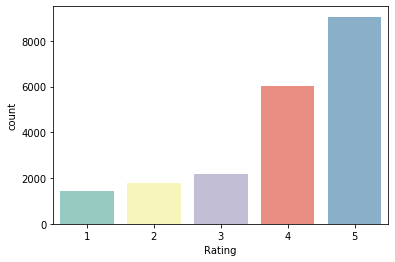

In [35]:
sns.countplot(data=data,x='Rating', palette="Set3")

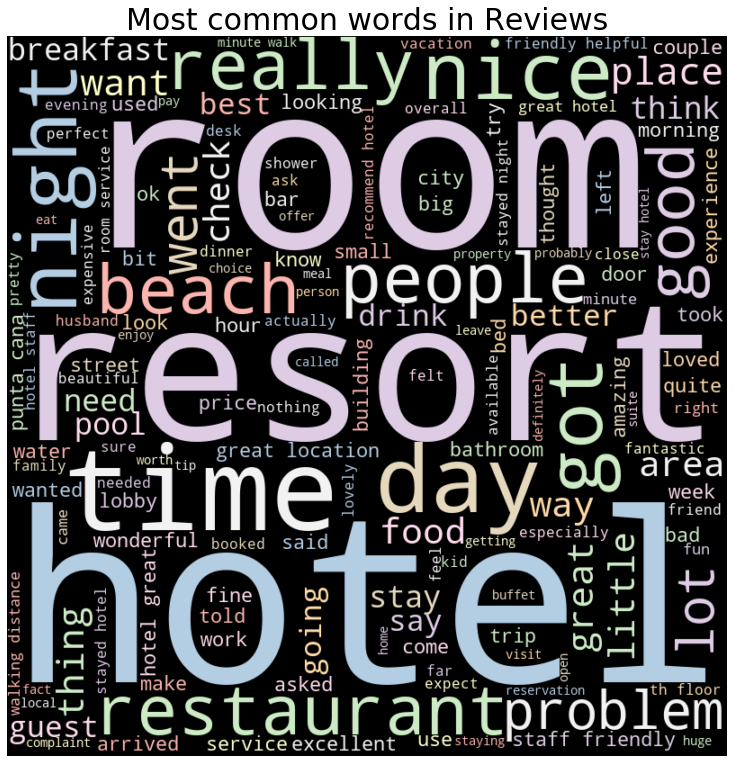

In [36]:
from wordcloud import WordCloud
def wordCloud_generator(data):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          colormap='Pastel1'
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Most common words in Reviews",fontsize=30)
    plt.show() 
    
wordCloud_generator(data['Review'])

# BUILDING MODEL

# NAIVE BAYES

# By using Count Vectorizer

In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [38]:
nb.fit(x_train_bow,y_train_bow)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_test_pred_bow = nb.predict(x_test_bow)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
nb_bow_accuracy = accuracy_score(y_test_bow,y_test_pred_bow)
nb_bow_accuracy*100

40.92387768379961

In [41]:
print(confusion_matrix(y_test_bow,y_test_pred_bow))

[[ 248  134   33   11    5]
 [ 206  230   90   40   11]
 [ 126  222  163   96   42]
 [ 179  391  274  421  502]
 [ 279  432  161  398 1454]]


In [42]:
print(classification_report(y_test_bow,y_test_pred_bow))

              precision    recall  f1-score   support

           1       0.24      0.58      0.34       431
           2       0.16      0.40      0.23       577
           3       0.23      0.25      0.24       649
           4       0.44      0.24      0.31      1767
           5       0.72      0.53      0.61      2724

    accuracy                           0.41      6148
   macro avg       0.36      0.40      0.35      6148
weighted avg       0.50      0.41      0.43      6148



# Using Decision Tree

# By Using CountVectorizer

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [46]:
dtc.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
y_test_pred_bow = dtc.predict(x_test_bow)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc_bow_accuracy = accuracy_score(y_test_bow,y_test_pred_bow)
dtc_bow_accuracy*100

44.355888093689

In [49]:
print(confusion_matrix(y_test_bow,y_test_pred_bow))

[[ 157   87   59   71   57]
 [  94  126   94  135  128]
 [  50   79  125  214  181]
 [  42   96  199  669  761]
 [  44   89  139  802 1650]]


In [50]:
print(classification_report(y_test_bow,y_test_pred_bow))

              precision    recall  f1-score   support

           1       0.41      0.36      0.38       431
           2       0.26      0.22      0.24       577
           3       0.20      0.19      0.20       649
           4       0.35      0.38      0.37      1767
           5       0.59      0.61      0.60      2724

    accuracy                           0.44      6148
   macro avg       0.36      0.35      0.36      6148
weighted avg       0.44      0.44      0.44      6148



# Using TFIDF Vectorizer

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [52]:
dtc.fit(xtrain_tfidf,ytrain_tfidf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
y_test_pred_tfidf = dtc.predict(xtest_tfidf)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc_tfidf_accuracy = accuracy_score(ytest_tfidf,y_test_pred_tfidf)
dtc_tfidf_accuracy*100

44.957709824333115

In [55]:
print(confusion_matrix(ytest_tfidf,y_test_pred_tfidf))

[[ 175   83   54   64   58]
 [  92  107   89  124  129]
 [  44   86  121  222  183]
 [  51  106  192  701  765]
 [  44  101  137  760 1660]]


In [56]:
print(classification_report(ytest_tfidf,y_test_pred_tfidf))

              precision    recall  f1-score   support

           1       0.43      0.40      0.42       434
           2       0.22      0.20      0.21       541
           3       0.20      0.18      0.19       656
           4       0.37      0.39      0.38      1815
           5       0.59      0.61      0.60      2702

    accuracy                           0.45      6148
   macro avg       0.37      0.36      0.36      6148
weighted avg       0.44      0.45      0.45      6148



# USING LOGISTIC REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression(random_state=12)

In [59]:
lr.fit(x_train_bow,y_train_bow)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
ytest_lr_bow_pred = lr.predict(x_test_bow)

In [61]:
from sklearn import metrics

In [62]:
lr_bow_score = metrics.accuracy_score(y_test_bow,ytest_lr_bow_pred)

In [63]:
lr_bow_score*100

56.6363044892648

In [64]:
print(confusion_matrix(y_test_bow,ytest_lr_bow_pred))

[[ 264  125   21   13    8]
 [ 126  207  140   72   32]
 [  29  114  210  219   77]
 [  13   57  177  846  674]
 [   9   20   51  689 1955]]


In [65]:
print(classification_report(y_test_bow,ytest_lr_bow_pred))

              precision    recall  f1-score   support

           1       0.60      0.61      0.61       431
           2       0.40      0.36      0.38       577
           3       0.35      0.32      0.34       649
           4       0.46      0.48      0.47      1767
           5       0.71      0.72      0.71      2724

    accuracy                           0.57      6148
   macro avg       0.50      0.50      0.50      6148
weighted avg       0.56      0.57      0.56      6148



# USING TF-IDF VECTORIZER

In [66]:
lr.fit(xtrain_tfidf,ytrain_tfidf)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
ytest_lr_tfidf_pred = lr.predict(xtest_tfidf)

In [68]:
from sklearn import metrics

In [69]:
lr_tfidf_score = metrics.accuracy_score(ytest_tfidf,ytest_lr_tfidf_pred)

In [70]:
lr_tfidf_score*100

62.06896551724138

In [71]:
print(confusion_matrix(ytest_tfidf,ytest_lr_tfidf_pred))

[[ 272  106   13   16   27]
 [  95  189  104   99   54]
 [  13   76  167  303   97]
 [   8   24   68  965  750]
 [   2    3    9  465 2223]]


In [72]:
print(classification_report(ytest_tfidf,ytest_lr_tfidf_pred))

              precision    recall  f1-score   support

           1       0.70      0.63      0.66       434
           2       0.47      0.35      0.40       541
           3       0.46      0.25      0.33       656
           4       0.52      0.53      0.53      1815
           5       0.71      0.82      0.76      2702

    accuracy                           0.62      6148
   macro avg       0.57      0.52      0.54      6148
weighted avg       0.60      0.62      0.61      6148



# USING SVM 

# USING COUNT VECTORIZER

In [73]:
from sklearn import svm
from sklearn.svm import SVC

In [74]:
model = svm.SVC(C=2, gamma='scale', kernel='linear')
model.fit(x_train_bow, y_train_bow)
prediction = model.predict(x_test_bow)

In [75]:
from sklearn import metrics
svm_bow_score = metrics.accuracy_score(y_test_bow,prediction)
svm_bow_score*100

53.23682498373454

In [76]:
print(confusion_matrix(y_test_bow,prediction))

[[ 270  127   21    7    6]
 [ 149  207  135   61   25]
 [  39  139  225  189   57]
 [  17   82  270  766  632]
 [  16   26  116  761 1805]]


In [77]:
print(classification_report( y_test_bow,prediction))

              precision    recall  f1-score   support

           1       0.55      0.63      0.59       431
           2       0.36      0.36      0.36       577
           3       0.29      0.35      0.32       649
           4       0.43      0.43      0.43      1767
           5       0.71      0.66      0.69      2724

    accuracy                           0.53      6148
   macro avg       0.47      0.49      0.48      6148
weighted avg       0.54      0.53      0.54      6148



# USING TFIDF VECTORIZER

In [78]:
from sklearn import svm
from sklearn.svm import SVC

In [79]:
model = svm.SVC(C=2, gamma='scale', kernel='linear')
model.fit(xtrain_tfidf, ytrain_tfidf)
prediction = model.predict(xtest_tfidf)

In [80]:
from sklearn import metrics
svm_tfidf_score = metrics.accuracy_score(ytest_tfidf,prediction)
svm_tfidf_score*100

61.044242029928434

In [81]:
print(confusion_matrix(ytest_tfidf,prediction))

[[ 283  113   19    7   12]
 [ 120  229  113   57   22]
 [  26  130  214  235   51]
 [  14   61  149  937  654]
 [   6   15   33  558 2090]]


In [82]:
print(classification_report( ytest_tfidf,prediction))

              precision    recall  f1-score   support

           1       0.63      0.65      0.64       434
           2       0.42      0.42      0.42       541
           3       0.41      0.33      0.36       656
           4       0.52      0.52      0.52      1815
           5       0.74      0.77      0.76      2702

    accuracy                           0.61      6148
   macro avg       0.54      0.54      0.54      6148
weighted avg       0.60      0.61      0.61      6148



# USING RANDOM FOREST

# using count vectorizer

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rmodel=RandomForestClassifier(n_estimators=100)

In [85]:
rmodel.fit(x_train_bow,y_train_bow)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
ytest_random_bow_pred=rmodel.predict(x_test_bow)

In [87]:
from sklearn import metrics

In [88]:
random_bow_score=metrics.accuracy_score(y_test_bow,ytest_random_bow_pred)

In [89]:
print(random_bow_score*100)

54.472999349381915


In [90]:
print(confusion_matrix(y_test_bow,ytest_random_bow_pred))

[[ 215   23   10   76  107]
 [  98   28   24  239  188]
 [  23    5   23  369  229]
 [   4    2    3  697 1061]
 [   2    0    0  336 2386]]


In [91]:
print(classification_report(y_test_bow,ytest_random_bow_pred))

              precision    recall  f1-score   support

           1       0.63      0.50      0.56       431
           2       0.48      0.05      0.09       577
           3       0.38      0.04      0.06       649
           4       0.41      0.39      0.40      1767
           5       0.60      0.88      0.71      2724

    accuracy                           0.54      6148
   macro avg       0.50      0.37      0.36      6148
weighted avg       0.51      0.54      0.48      6148



# using tfidf vectorizer

In [92]:
rmodel=RandomForestClassifier(n_estimators=100)

In [93]:
rmodel.fit(xtrain_tfidf,ytrain_tfidf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
ytest_random_tdif_pred=rmodel.predict(xtest_tfidf)

In [95]:
from sklearn import metrics

In [96]:
random_tdif_score=metrics.accuracy_score(ytest_tfidf,ytest_random_tdif_pred)

In [97]:
print(random_tdif_score*100)

55.36759921925829


In [98]:
print(confusion_matrix(ytest_tfidf,ytest_random_tdif_pred))

[[ 208   25    4   62  135]
 [  71   31   13  212  214]
 [   8   10   25  384  229]
 [   1    5    1  679 1129]
 [   0    0    0  241 2461]]


In [99]:
print(classification_report(y_test_bow,ytest_random_bow_pred))

              precision    recall  f1-score   support

           1       0.63      0.50      0.56       431
           2       0.48      0.05      0.09       577
           3       0.38      0.04      0.06       649
           4       0.41      0.39      0.40      1767
           5       0.60      0.88      0.71      2724

    accuracy                           0.54      6148
   macro avg       0.50      0.37      0.36      6148
weighted avg       0.51      0.54      0.48      6148



In [100]:
model_compare = pd.DataFrame({"Naive Bayes":nb_bow_accuracy,
                            "Logistic Regression":lr_bow_score,
                           "Decision Tree":dtc_bow_accuracy,
                              "Random Forest":random_bow_score,
                              "SVM":svm_bow_score,
                            },index=["accuracy"])

In [101]:
model_compare

,Naive Bayes,Logistic Regression,Decision Tree,Random Forest,SVM
accuracy,0.409239,0.566363,0.443559,0.54473,0.532368


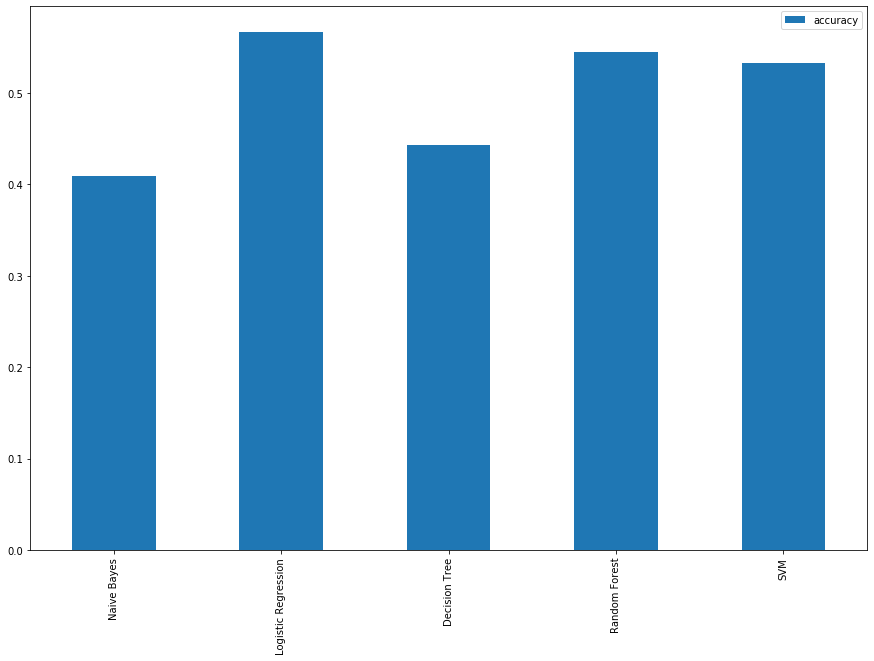

In [102]:
model_compare.T.plot.bar(figsize=(15,10));

In [103]:
model_compare_tfidf = pd.DataFrame({                            "Logistic Regression":lr_tfidf_score,
                           "Decision Tree":dtc_tfidf_accuracy,
                              "Random Forest":random_tdif_score,
                              "SVM":svm_tfidf_score,
                            },index=["accuracy"])

In [104]:
model_compare_tfidf

,Logistic Regression,Decision Tree,Random Forest,SVM
accuracy,0.62069,0.449577,0.553676,0.610442


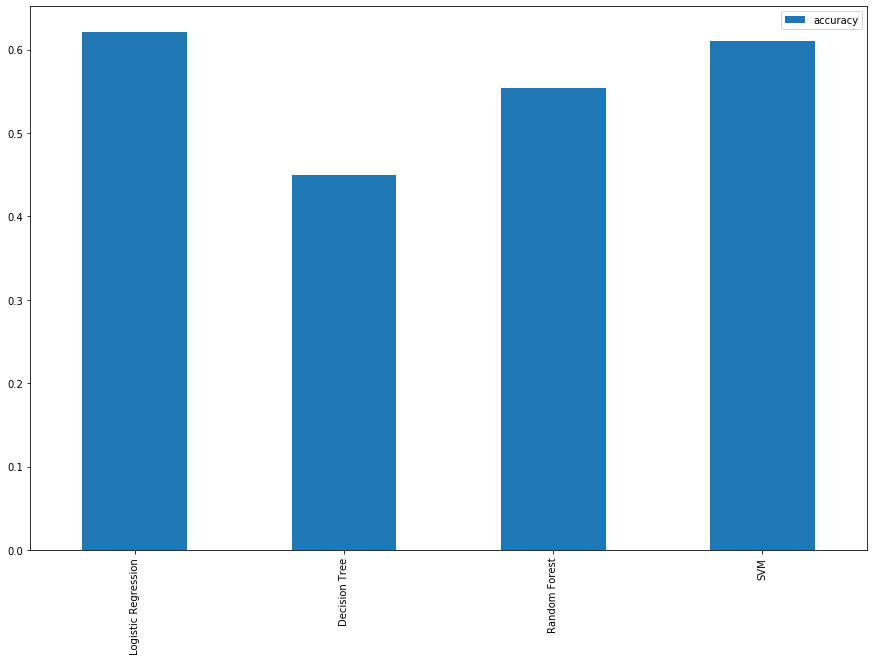

In [105]:
model_compare_tfidf.T.plot.bar(figsize=(15,10));

# Choose Logistic Regression for deployment as it has the maximum accuracy

# Saving the model

In [106]:
import pickle
pickle.dump(lr,open("Rating.pkl","wb"))

In [108]:
model_load = pickle.load(open("Rating.pkl","rb"))
model_load.predict(xtest_tfidf)
model_load.score(xtest_tfidf,ytest_tfidf)

0.6206896551724138